In [1]:
import numpy as np
import matplotlib.tri as tri
import matplotlib.pyplot as plt

In [2]:
# first create the x and y coordinates of the points
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

In [3]:
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

In [4]:
x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

In [5]:
# create the Triangulation; no triangles so Delaunay triangulation created
triang = tri.Triangulation(x, y)
# mask off unwanted triangles
triang.set_mask(
    np.hypot(
        x[triang.triangles].mean(axis=1),
        y[triang.triangles].mean(axis=1)
    ) < min_radius
)

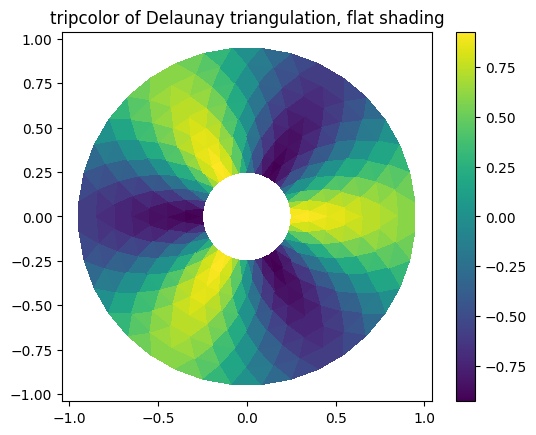

In [6]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
tpc = ax.tripcolor(triang, z, shading="flat")
fig.colorbar(tpc, ax=ax)
ax.set_title("tripcolor of Delaunay triangulation, flat shading")

plt.show()

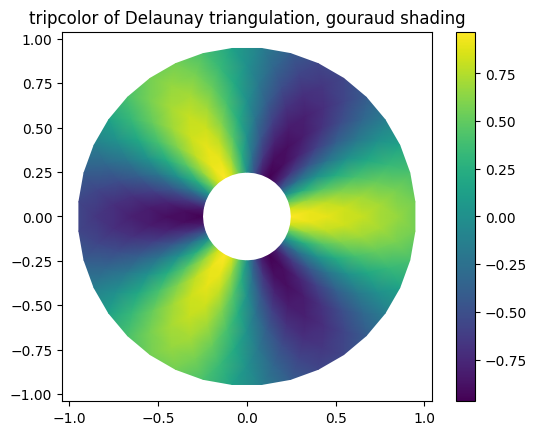

In [7]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
tpc = ax.tripcolor(triang, z, shading="gouraud")
fig.colorbar(tpc, ax=ax)
ax.set_title("tripcolor of Delaunay triangulation, gouraud shading")

plt.show()